# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

In [2]:
x = np.random.randint(-100, 100, 300)
y = np.sin(x) + -2.3 * (x ** 2) + 2 * (x) + 1500 * np.random.randn(300)    # ax2 + bx + c

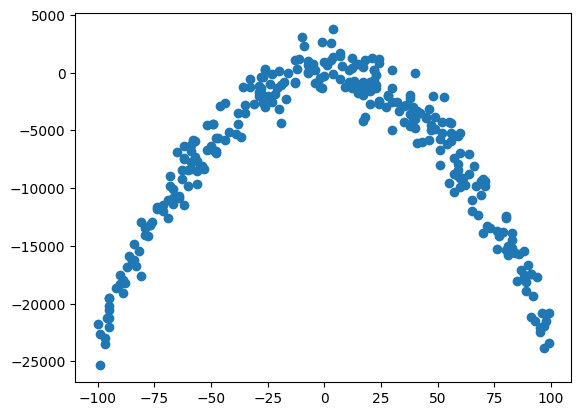

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
df = pd.DataFrame({
    "inputs": x, 
    "outputs":y
    })

df.sample(10)

,inputs,outputs
139,99,-23451.369576
13,-81,-17635.837461
72,-62,-11475.199501
160,-39,-5337.815254
52,80,-12577.379465
79,-42,-5119.658236
91,81,-15025.259958
10,-49,-4464.573535
99,38,-1888.951988
188,-90,-17510.043649


In [5]:
X = df[["inputs"]]
y = df["outputs"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((240, 1), (60, 1), (240,), (60,))

In [8]:
poly = PolynomialFeatures(degree = 3)
poly

,degree,3
,interaction_only,False
,include_bias,True
,order,'C'


In [9]:
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

In [10]:
x_test_trans

array([[ 1.00000e+00, -7.70000e+01,  5.92900e+03, -4.56533e+05],
       [ 1.00000e+00,  1.70000e+01,  2.89000e+02,  4.91300e+03],
       [ 1.00000e+00,  9.50000e+01,  9.02500e+03,  8.57375e+05],
       [ 1.00000e+00,  6.60000e+01,  4.35600e+03,  2.87496e+05],
       [ 1.00000e+00, -2.30000e+01,  5.29000e+02, -1.21670e+04],
       [ 1.00000e+00,  8.00000e+01,  6.40000e+03,  5.12000e+05],
       [ 1.00000e+00,  6.90000e+01,  4.76100e+03,  3.28509e+05],
       [ 1.00000e+00,  4.00000e+00,  1.60000e+01,  6.40000e+01],
       [ 1.00000e+00,  5.90000e+01,  3.48100e+03,  2.05379e+05],
       [ 1.00000e+00,  7.70000e+01,  5.92900e+03,  4.56533e+05],
       [ 1.00000e+00, -7.70000e+01,  5.92900e+03, -4.56533e+05],
       [ 1.00000e+00, -5.70000e+01,  3.24900e+03, -1.85193e+05],
       [ 1.00000e+00, -6.20000e+01,  3.84400e+03, -2.38328e+05],
       [ 1.00000e+00, -6.80000e+01,  4.62400e+03, -3.14432e+05],
       [ 1.00000e+00,  4.60000e+01,  2.11600e+03,  9.73360e+04],
       [ 1.00000e+00, -1.

In [11]:
poly_r = LinearRegression()
poly_r.fit(x_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
print("Training :", r2_score(y_true = y_train, y_pred = poly_r.predict(x_train_trans)))   # 240
print("Testing :", r2_score(y_true = y_test, y_pred = poly_r.predict(x_test_trans)))    # 60

Training : 0.961554003604353
Testing : 0.9461811787399153


In [13]:

x_line = np.linspace(-100, 100, 1000).reshape(-1, 1)

x_line_trans = poly.transform(x_line) 

C:\Users\nddha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


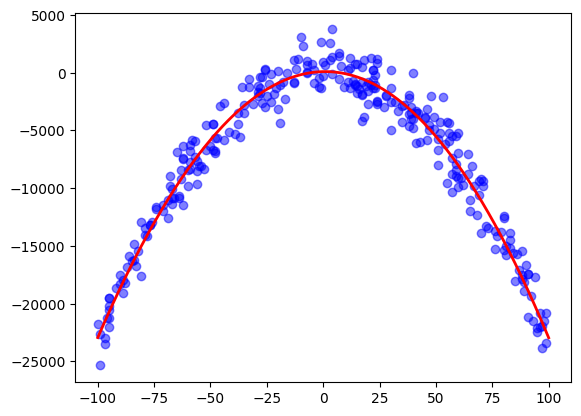

In [14]:
plt.scatter(X, y, color='blue', alpha=0.5)
y_line = poly_r.predict(x_line_trans)
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.show()